In [67]:
import pandas as pd 
import numpy as np
import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:

data=pd.read_json('dkdata.json',orient='split')

In [79]:
data.head()

,amount_eur,amount_orig,amount_orig_currency,amount_usd,beneficiary_account,beneficiary_bank_country,beneficiary_core,beneficiary_jurisdiction,beneficiary_name,beneficiary_name_norm,...,investigation,payer_account,payer_bank_country,payer_core,payer_jurisdiction,payer_name,payer_name_norm,payer_type,purpose,source_file
0,431762.31,535470.00,USD,535470,EE27 3300 3335 0561 0002,EE,True,GB,LCM ALLIANCE LLP,LCM ALLIANCE LLP,...,az,33817018409333311204,33,False,AZ,AZARBAYCAN METANOL KOMPANI MMC,AZARBAYCAN METANOL KOMPANI MMC,Company,1206295100052180 OCT4121800021 ADVANCE PAYM FO...,pdf/LCM ALLIANCE Account statement 30.06.12-31...
1,423688.44,-535000.00,USD,535000,333504500003,33,False,GB,MOBILA LLP,MOBILA LLP,...,az,EE27 3300 3335 0561 0002,EE,True,GB,LCM ALLIANCE LLP,LCM ALLIANCE LLP,Company,1207035026699176 INVOICE.No 6215 DD 25.05.2012,pdf/LCM ALLIANCE Account statement 30.06.12-31...
2,71698.53,90535.19,USD,90536,EE77 3300 3334 8704 0004,EE,True,GB,METASTAR INVEST LLP,METASTAR INVEST LLP,...,az,20100374548222,20,False,GB,SKN ELECTRICAL SERVICES LIMITEDACCO,SKN ELECTRICAL SERVICES LIMITED,Company,"1207065103089249 /FEE/USD4,81",pdf/METASTAR Account statement 30.06.12-31.12....
3,71686.50,-90520.00,USD,90520,333455870002,33,False,VG,INMAXO CAPITAL CORP,INMAXO CAPITAL CORP.,...,az,EE77 3300 3334 8704 0004,EE,True,GB,METASTAR INVEST LLP,METASTAR INVEST LLP,Company,1207095022358525 DOGOVOR ZAYMA,pdf/METASTAR Account statement 30.06.12-31.12....
4,47.52,-60.00,USD,60,333455870002,33,False,VG,INMAXO CAPITAL CORP,INMAXO CAPITAL CORP.,...,az,EE77 3300 3334 8704 0004,EE,True,GB,METASTAR INVEST LLP,METASTAR INVEST LLP,Company,1207135024578077 DOGOVOR ZAYMA,pdf/METASTAR Account statement 30.06.12-31.12....


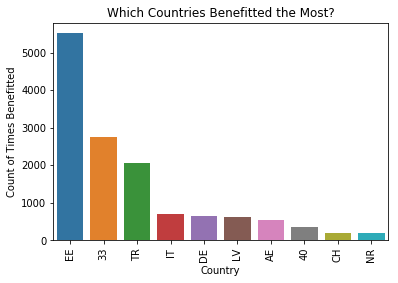

In [70]:
#fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=data['beneficiary_bank_country'],order=data.beneficiary_bank_country.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Which Countries Benefitted the Most?')
plt.xlabel('Country')
plt.ylabel('Count of Times Benefitted')
plt.show()

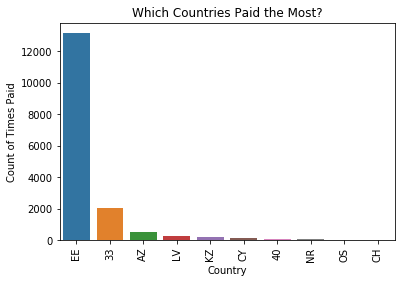

In [71]:
ax = sns.countplot(x=data['payer_bank_country'],order=data.payer_bank_country.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Which Countries Paid the Most?')
plt.xlabel('Country')
plt.ylabel('Count of Times Paid')
plt.show()

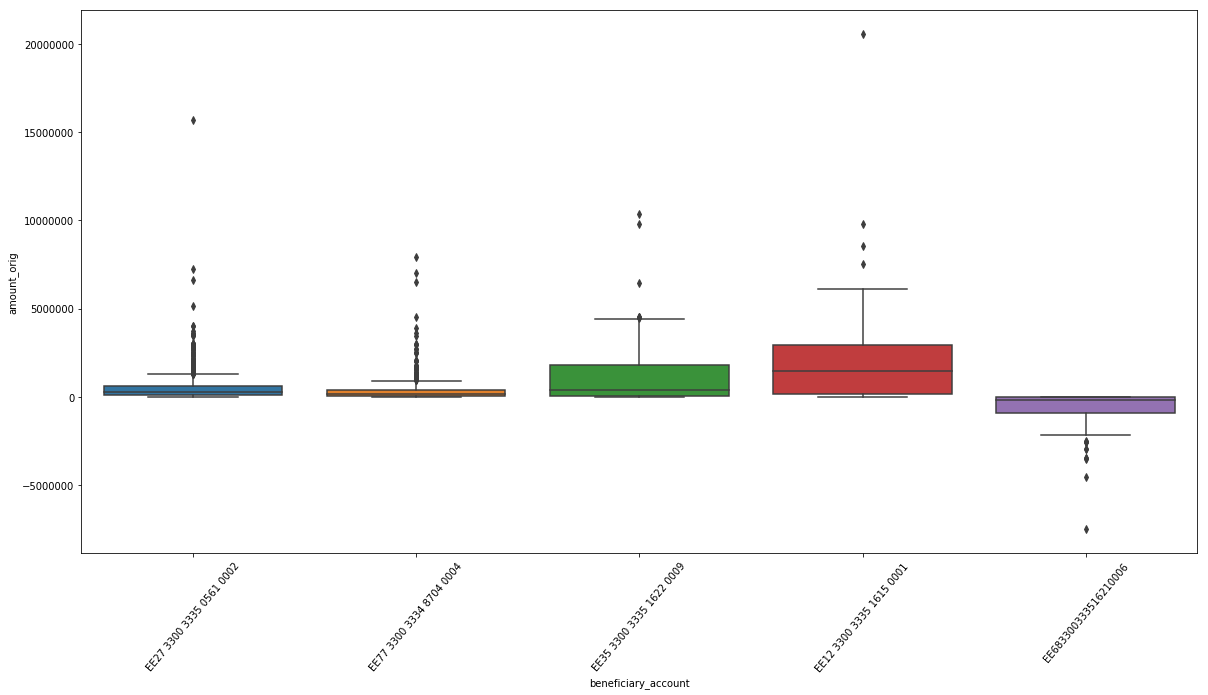

In [72]:
df_account=data.groupby('beneficiary_account').filter(lambda x: len(x) >= 300)

plt.figure(figsize=(20,10))
sns.boxplot(y=df_account.amount_orig, x=df_account.beneficiary_account,data=data);

plt.xticks(rotation=50)
plt.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Account',fontsize=16, fontweight='bold', color='#191970', )
ax.set_ylabel('Amounts', fontsize=16, fontweight='bold', color='#191970')
plt.show()

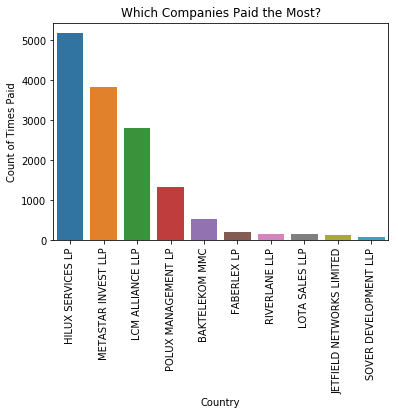

In [73]:
ax = sns.countplot(x=data['payer_name'],order=data.payer_name.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Which Companies Paid the Most?')
plt.xlabel('Country')
plt.ylabel('Count of Times Paid')
plt.show()

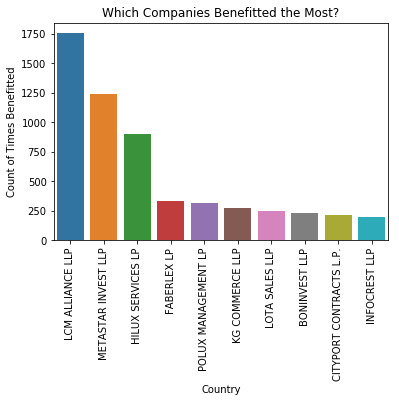

In [74]:
ax = sns.countplot(x=data['beneficiary_name'],order=data.beneficiary_name.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Which Companies Benefitted the Most?')
plt.xlabel('Country')
plt.ylabel('Count of Times Benefitted')
plt.show()

In [75]:
data['amount_eur']=(data['amount_eur'].replace( '[\$,)]','', regex=True).astype(float))
# The amount_eur variable was a string with a dollar sign character. This code changes the 
#variable to a float and removes the dollaur sign enabling us to do analysis. 

In [83]:
con = sqlite3.connect('db_money.db')
data.to_sql("money", con, if_exists='replace', index=False)

In [84]:
high=pd.read_sql_query('SELECT * FROM money WHERE amount_eur >5000000',con)

In [85]:
high

,amount_eur,amount_orig,amount_orig_currency,amount_usd,beneficiary_account,beneficiary_bank_country,beneficiary_core,beneficiary_jurisdiction,beneficiary_name,beneficiary_name_norm,...,investigation,payer_account,payer_bank_country,payer_core,payer_jurisdiction,payer_name,payer_name_norm,payer_type,purpose,source_file
0,5544220.55,7000800.0,USD,7000800,EE77 3300 3334 8704 0004,EE,1,GB,METASTAR INVEST LLP,METASTAR INVEST LLP,...,az,333488110001,33,0,NZ,JETFIELD NETWORKS LIMITED,JETFIELD NETWORKS LIMITED,Company,1207275026111230 INV.333 DD 30.06.2012,pdf/METASTAR Account statement 30.06.12-31.12....
1,6455689.42,7915400.0,USD,7915400,EE77 3300 3334 8704 0004,EE,1,GB,METASTAR INVEST LLP,METASTAR INVEST LLP,...,az,333488110001,33,0,NZ,JETFIELD NETWORKS LIMITED,JETFIELD NETWORKS LIMITED,Company,1208095025633675 INV.333 DD 30.06.2012,pdf/METASTAR Account statement 30.06.12-31.12....
2,5063942.80,6499976.0,USD,6499976,EE77 3300 3334 8704 0004,EE,1,GB,METASTAR INVEST LLP,METASTAR INVEST LLP,...,az,333488110001,33,0,NZ,JETFIELD NETWORKS LIMITED,JETFIELD NETWORKS LIMITED,Company,1304175070769601 INV.0546/8762 DD 05.03.2013,pdf/METASTAR Account statement 30.06.12-31.12....
3,15180865.05,20559970.0,USD,20559970,EE12 3300 3335 1615 0001,EE,1,GB,HILUX SERVICES LP,HILUX SERVICES LP,...,az,NL11ATBA0802866001,NL,0,UNKNOWN,SECURO LTD.,SECURO LTD.,Company,1311275108326781 SUPPLY CONTRACT AZ/256/2013 I...,pdf/HILUX Account statement 30.06.12-31.12.14.xml
4,6000000.00,6000000.0,EUR,8154113,EE12 3300 3335 1615 0001,EE,1,GB,HILUX SERVICES LP,HILUX SERVICES LP,...,az,LV69AIZK0001140063593,LV,0,AZ,ARASH MEDICAL PRODUCTION LTD,ARASH MEDICAL PRODUCTION LTD,Company,1312045105228931 FOR MEDICAL EQUIPMENT AGREEME...,pdf/HILUX Allegato 4.xml
5,5815752.00,-8000000.0,USD,8000000,EE333300333505590009,EE,0,GB,KG COMMERCE LLP,KG COMMERCE LLP,...,az,EE12 3300 3335 1615 0001,EE,1,GB,HILUX SERVICES LP,HILUX SERVICES LP,Company,1401095076846464 PAYMENT TO THE CONTRACT N 333...,pdf/HILUX Account statement 30.06.12-31.12.14.xml
6,6227148.48,8565906.5,USD,8565907,EE12 3300 3335 1615 0001,EE,1,GB,HILUX SERVICES LP,HILUX SERVICES LP,...,az,TXID/AZ/1700986181,TX,0,AZ,MODIAR,MODIAR,Person,1401085101288436 INV HS-04/02-36 26 12 13 FULL...,pdf/HILUX Account statement 30.06.12-31.12.14.xml
7,7500000.00,-7500000.0,EUR,10259357,EE683300333516210006,EE,0,GB,FABERLEX LP,FABERLEX LP,...,az,EE12 3300 3335 1615 0001,EE,1,GB,HILUX SERVICES LP,HILUX SERVICES LP,Company,PAYMENT TO THE CONTRACT N 5 DD.02.12.2013,pdf/HILUX Account statement 30.06.12-31.12.14.xml
8,7500000.00,7500000.0,EUR,10259357,EE12 3300 3335 1615 0001,EE,1,GB,HILUX SERVICES LP,HILUX SERVICES LP,...,az,LV69AIZK0001140063593,LV,0,AZ,ARASH MEDICAL PRODUCTION LTD,ARASH MEDICAL PRODUCTION LTD,Company,1407035107325514 PAYMENT FOR EQUIPMENT CONTRAC...,pdf/HILUX Account statement 30.06.12-31.12.14.xml
9,9800000.00,9800000.0,EUR,12223552,EE12 3300 3335 1615 0001,EE,1,GB,HILUX SERVICES LP,HILUX SERVICES LP,...,az,LU450825017019781001,LU,0,GB,SECURO LIMITED,SECURO LIMITED,Company,1412125105574718 /INV/001/934 DATE 10.12.2014,pdf/HILUX Account statement 30.06.12-31.12.14.xml
